In [185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [186]:
data = pd.read_csv('/kaggle/input/german-credit-data/german_credit_data.csv',index_col=[0])

In [187]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [188]:
data.columns = ['age', 'sex', 'job', 'housing', 'savings_account', 'checking_account', 'credit_amount', 'duration', 'purpose', 'risk_target']

In [189]:
data.tail()

,age,sex,job,housing,savings_account,checking_account,credit_amount,duration,purpose,risk_target
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [190]:
print(data.shape)
print(data.isnull().sum())

(1000, 10)
age                   0
sex                   0
job                   0
housing               0
savings_account     183
checking_account    394
credit_amount         0
duration              0
purpose               0
risk_target           0
dtype: int64


In [191]:
data.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


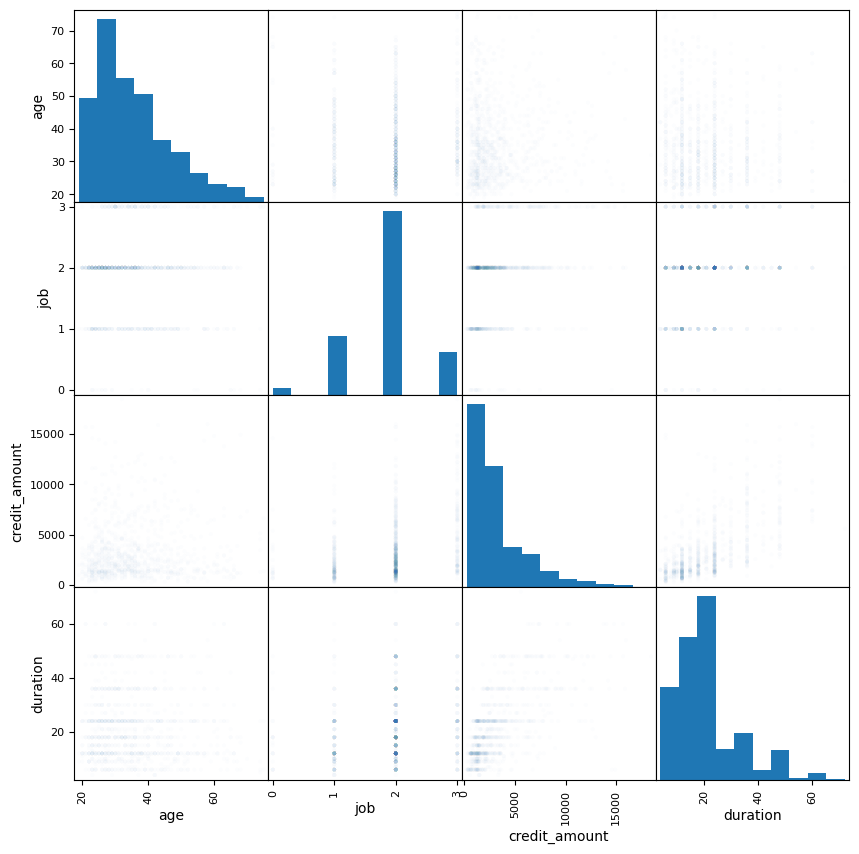

In [192]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [193]:
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.median(axis=0))

age                33.0
job                 2.0
credit_amount    2319.5
duration           18.0
dtype: float64


In [194]:
print(data.columns)

Index(['age', 'sex', 'job', 'housing', 'savings_account', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'risk_target'],
      dtype='object')


In [195]:
categorical_columns = [i for i in data.columns if data[i].dtype.name == 'object']
numerical_columns   = [i for i in data.columns if data[i].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['sex', 'housing', 'savings_account', 'checking_account', 'purpose', 'risk_target']
['age', 'job', 'credit_amount', 'duration']


In [196]:
for i in categorical_columns:
    print(i, data[i].unique())

sex ['male' 'female']
housing ['own' 'free' 'rent']
savings_account [nan 'little' 'quite rich' 'rich' 'moderate']
checking_account ['little' 'moderate' nan 'rich']
purpose ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
risk_target ['good' 'bad']


In [197]:
data.head()

,age,sex,job,housing,savings_account,checking_account,credit_amount,duration,purpose,risk_target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [198]:
data['savings_account'].describe().top

'little'

In [199]:
data['savings_account'] = data['savings_account'].fillna('little')

In [200]:
data['checking_account'].describe().top

'little'

In [201]:
data['checking_account'] = data['checking_account'].fillna('little')

In [202]:
data.describe(include = [object])

,sex,housing,savings_account,checking_account,purpose,risk_target
count,1000,1000,1000,1000,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,786,668,337,700


In [203]:
data_describe = data.describe(include = [object])
binary_columns    = [i for i in categorical_columns if data_describe[i]['unique'] == 2]
nonbinary_columns = [i for i in categorical_columns if data_describe[i]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['sex', 'risk_target'] ['housing', 'savings_account', 'checking_account', 'purpose']


In [204]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [211]:
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['sex'] = data['sex'].astype('float64')
print(data['sex'].describe())

count    1000.000000
mean        0.310000
std         0.462725
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64


/tmp/ipykernel_30/957913509.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})


In [213]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['housing_free', 'housing_own', 'housing_rent', 'savings_account_little',
       'savings_account_moderate', 'savings_account_quite rich',
       'savings_account_rich', 'checking_account_little',
       'checking_account_moderate', 'checking_account_rich',
       'purpose_business', 'purpose_car', 'purpose_domestic appliances',
       'purpose_education', 'purpose_furniture/equipment', 'purpose_radio/TV',
       'purpose_repairs', 'purpose_vacation/others'],
      dtype='object')


In [214]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,job,credit_amount,duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [216]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,job,credit_amount,duration
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.842171e-17,-1.776357e-17,-8.881784e-18,-2.486900e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.454533e+00,-2.913034e+00,-1.070329e+00,-1.401713e+00
25%,-7.512658e-01,1.468757e-01,-6.751455e-01,-7.382981e-01
50%,-2.238150e-01,1.468757e-01,-3.371756e-01,-2.407368e-01
75%,5.673612e-01,1.468757e-01,2.483377e-01,2.568246e-01
max,3.468341e+00,1.676831e+00,5.368103e+00,4.237315e+00


In [219]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data.describe()

,age,job,credit_amount,duration,sex
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,2.842171e-17,-1.776357e-17,-8.881784e-18,-2.486900e-17,0.310000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.462725
min,-1.454533e+00,-2.913034e+00,-1.070329e+00,-1.401713e+00,0.000000
25%,-7.512658e-01,1.468757e-01,-6.751455e-01,-7.382981e-01,0.000000
50%,-2.238150e-01,1.468757e-01,-3.371756e-01,-2.407368e-01,0.000000
75%,5.673612e-01,1.468757e-01,2.483377e-01,2.568246e-01,1.000000
max,3.468341e+00,1.676831e+00,5.368103e+00,4.237315e+00,1.000000


In [221]:
X = data.drop('risk_target', axis = 1)
y = data['risk_target']
feature_names = X.columns
feature_names

Index(['age', 'job', 'credit_amount', 'duration', 'housing_free',
       'housing_own', 'housing_rent', 'savings_account_little',
       'savings_account_moderate', 'savings_account_quite rich',
       'savings_account_rich', 'checking_account_little',
       'checking_account_moderate', 'checking_account_rich',
       'purpose_business', 'purpose_car', 'purpose_domestic appliances',
       'purpose_education', 'purpose_furniture/equipment', 'purpose_radio/TV',
       'purpose_repairs', 'purpose_vacation/others', 'sex'],
      dtype='object')

In [222]:
data['risk_target']

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: risk_target, Length: 1000, dtype: object

In [223]:
X = X.to_numpy()
y = np.array(y != 'good', dtype='int')


In [224]:
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [225]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1000, 23)
(1000,)


In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

700 300


In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [232]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

0.30666666666666664

In [233]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[194  15]
 [ 77  14]]


In [234]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2857142857142858 15


In [235]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2642857142857143 0.2966666666666667
